# SVD

SVD a una imagen para validar resultados con CUDA __cusolverDnDgesvd__

Equipo_6 

Integrantes:

* Ricardo Lastra

* Adrián Vázquez

**Antecedentes:**

La factorizacion $SVD$ es uno de los modelos de factorizaciones de matrices mas usados hoy en dia por muchas paqueterias computacionales, esta nos ayuda a hacer aproximaciones a matrices de una forma muy eficiente.

Usando el metodo thin $SVD$ visto en clase, el cual dice que necesitamos encontrar la matriz $Vi$ ortogonal de $nxn$ y una matriz $Ui$ con columnas ortonormales de $mxn$ tales que $Ui^T A-V=B$ sea Bidiagonal.

Posteriormente en una necesitamos multiplicar $U=U_1U_2$, $V=V_1V_2$ para obtener $A=U\Sigma V^T$ y asi obtener valores singulares en la diagonal de $\Sigma$.

**Desarrollo del programa:**

In [1]:
#SE IMPORTAN LIBRERIAS PARA GRAFICAR, PARA COMPUTO DE MATRICES Y PARA LEER IMAGENES
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

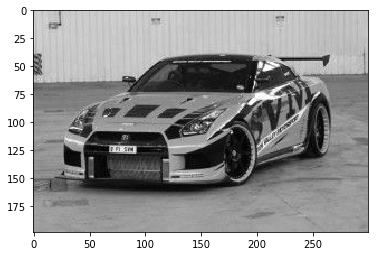

In [3]:
#SE LEE UNA IMAGEN, SE LEE Y SE GUARDA COMO BLANCO Y NEGRO 
img = Image.open('GTR.jpg')
#img.rotate(45).show() #Para rotar la imagen cierto no. de grados, eje 45grados
imggray = img.convert('LA')
plt.figure(figsize=(6, 6))
plt.imshow(imggray)

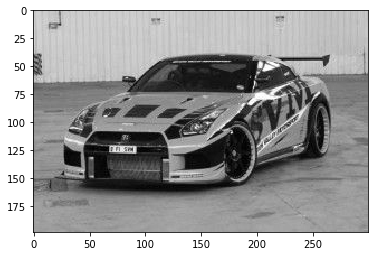

In [61]:
# SE GUARDA EN UNA MATRIZ CON NUMPY Y SE GRAFICA LA IMAGEN
imgmatriz = np.array(list(imggray.getdata(band=0)), float)
imgmatriz.shape = (imggray.size[1], imggray.size[0])
imgmatriz = np.matrix(imgmatriz)
plt.figure(figsize=(6,6))
plt.imshow(imgmatriz, cmap='gray')

In [62]:
#VISUALIZAMOS LA IMAGEN ANTERIOR EN FORMA MATRICIAL
print(imgmatriz)

[[ 205.  192.  192. ...,  196.  193.  185.]
 [ 205.  192.  191. ...,  197.  195.  187.]
 [ 207.  194.  194. ...,  199.  197.  188.]
 ..., 
 [ 160.  160.  159. ...,  164.  166.  167.]
 [ 159.  158.  158. ...,  147.  147.  146.]
 [ 156.  156.  157. ...,  144.  143.  141.]]


In [63]:
#DIMENSION DEL ARREGLO
imgmatriz.ndim

2

In [64]:
#DIEMNSION DEL ARREGLO "TUPLA"
imgmatriz.shape

(199, 300)

In [65]:
#NUMERO DE ENTRADAS DEL ARREGLO 
imgmatriz.size

59700

In [66]:
#LONGITUD DE UNA ENTRADA DEL ARREGLO EN bytes
imgmatriz.itemsize

8

In [67]:
#TOTAL DE bytes DEL ARREGLO
imgmatriz.nbytes

477600

**Se computa $SVD$ : **

In [30]:
#SE HACE LA DESCOMPOSICION DE VALORES SINGULARES
U, sigma, Vt = np.linalg.svd(imgmatriz)

**Imprimimos resultados de las matrices $U$ $\Sigma$ $Vt$ : **

In [31]:
print("U:")
print(U)
print("sigma:")
print(sigma)
print("Vt:")
print(Vt)

U:
[[-0.09986045 -0.05026461 -0.03315873 ..., -0.02250935 -0.01326875
  -0.09977819]
 [-0.1000951  -0.05049276 -0.03465434 ...,  0.11629303 -0.04303059
   0.14150533]
 [-0.10031486 -0.05080684 -0.0350976  ..., -0.25283985  0.15213553
  -0.03689725]
 ..., 
 [-0.08030359 -0.04164378 -0.01553057 ..., -0.02117016 -0.00719392
  -0.01020098]
 [-0.08043311 -0.0407709  -0.01730467 ...,  0.03684279  0.04020065
   0.02045947]
 [-0.08013873 -0.04111574 -0.01785941 ..., -0.03919543 -0.02734283
  -0.02599257]]
sigma:
[  3.39450626e+04   5.20902177e+03   4.47590816e+03   3.13919865e+03
   2.81495761e+03   2.46503752e+03   2.36777518e+03   2.03564403e+03
   1.72070532e+03   1.38711563e+03   1.30083445e+03   1.26088303e+03
   1.23717471e+03   1.07661609e+03   1.05231822e+03   1.03086491e+03
   9.48265831e+02   9.27817334e+02   8.96587430e+02   8.67474840e+02
   7.96122318e+02   7.84705410e+02   7.79125944e+02   7.12892247e+02
   6.83258461e+02   6.57903911e+02   6.37093525e+02   6.21392122e+02
   5.98

In [71]:
#TOTAL DE bytes DEL ARREGLO (solo sigma)
sigma.nbytes

1592

**Visualizamos la $/Sigma$ en una matriz diagonal:**

In [32]:
S = np.zeros(imgmatriz.shape, "float")
S[:min(imgmatriz.shape), :min(imgmatriz.shape)] = np.diag(sigma)
print(S)

[[ 33945.06263786      0.              0.         ...,      0.              0.
       0.        ]
 [     0.           5209.02177166      0.         ...,      0.              0.
       0.        ]
 [     0.              0.           4475.90816332 ...,      0.              0.
       0.        ]
 ..., 
 [     0.              0.              0.         ...,      0.              0.
       0.        ]
 [     0.              0.              0.         ...,      0.              0.
       0.        ]
 [     0.              0.              0.         ...,      0.              0.
       0.        ]]


**Calculo y reconstrucción:**

Se calcula una aproximacion usando la primera columna de U y la primera fila de V reporduciendo la  imagen, cada columna de pixeles es una ponderacion de los mismos valores originales $\vec{u}_1 $ :


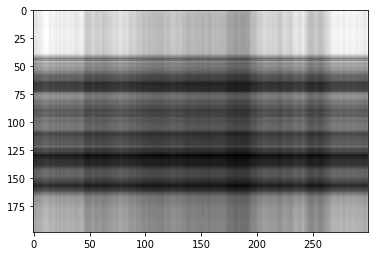

In [36]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.figure(figsize=(6,6))
plt.imshow(reconstimg, cmap='gray');

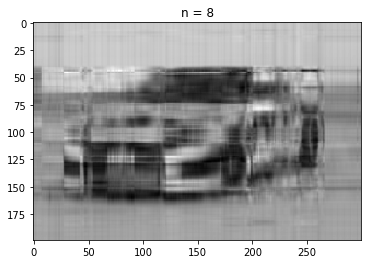

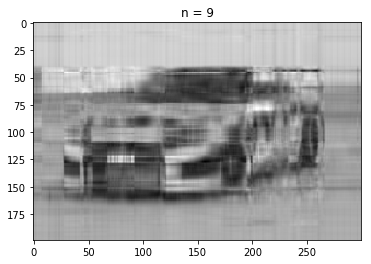

In [38]:
#RECONSTRUIMOS CON 8 Y 9 VECTORES
for i in range(8, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

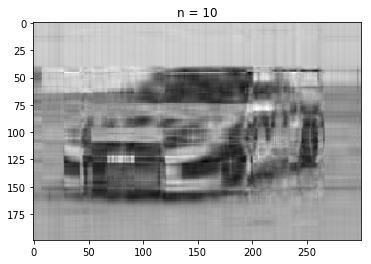

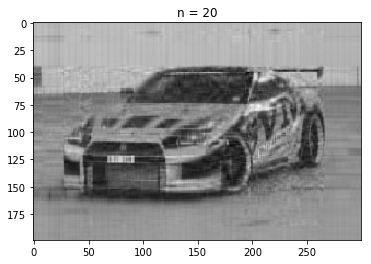

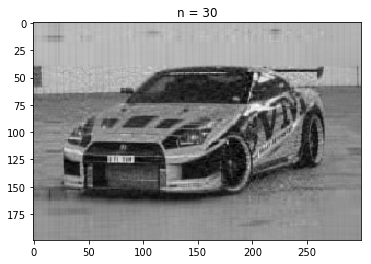

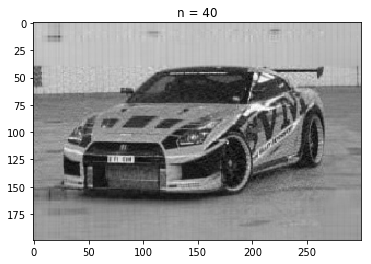

In [53]:
#RECONSTRUIMOS DE 10 EN 10 VECTORES PARA VER CUANDO SE REPRODUCE UNA IMAGEN SIMILAR A LA ORIGINAL...
for i in range(10,50, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

**Reconstruccion de matriz original:**

In [33]:
np.dot(U, np.dot(S, Vt)) #se usa Vt

matrix([[ 205.,  192.,  192., ...,  196.,  193.,  185.],
        [ 205.,  192.,  191., ...,  197.,  195.,  187.],
        [ 207.,  194.,  194., ...,  199.,  197.,  188.],
        ..., 
        [ 160.,  160.,  159., ...,  164.,  166.,  167.],
        [ 159.,  158.,  158., ...,  147.,  147.,  146.],
        [ 156.,  156.,  157., ...,  144.,  143.,  141.]])

In [34]:
imgmatriz

matrix([[ 205.,  192.,  192., ...,  196.,  193.,  185.],
        [ 205.,  192.,  191., ...,  197.,  195.,  187.],
        [ 207.,  194.,  194., ...,  199.,  197.,  188.],
        ..., 
        [ 160.,  160.,  159., ...,  164.,  166.,  167.],
        [ 159.,  158.,  158., ...,  147.,  147.,  146.],
        [ 156.,  156.,  157., ...,  144.,  143.,  141.]])